In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib inline

region = ['Azerbaijan','Bahamas', 'Bangladesh', 'Belize', 'Bhutan',
          'Cambodia', 'Cameroon', 'Cape Verde', 'Chile', 'China']   #10个

kind = ['Afforestation & reforestation', 'Biofuels', 'Biogas', 'Biomass', 'Cement']   #5个

np.random.seed(20180316)
arr_region = np.random.choice(region, size=(200,))
list_region = list(arr_region)

arr_kind = np.random.choice(kind, size=(200,))
list_kind = list(arr_kind)

values = np.random.randint(100, 200, 200)
list_values = list(values)

df = pd.DataFrame({'region':list_region,'kind': list_kind,'values':list_values})
df

,region,kind,values
0,Cameroon,Cement,140
1,Bhutan,Afforestation & reforestation,178
2,China,Biofuels,161
3,Cambodia,Afforestation & reforestation,100
4,Bahamas,Biofuels,129
...,...,...,...
195,Belize,Biofuels,119
196,China,Biofuels,183
197,Cameroon,Biogas,114
198,China,Afforestation & reforestation,143


In [3]:
df['kind'].value_counts()

Cement                           47
Biogas                           44
Biofuels                         41
Afforestation & reforestation    38
Biomass                          30
Name: kind, dtype: int64

In [4]:
import pandas as pd
pt = df.pivot_table(index='kind', columns='region', values='values', aggfunc=np.sum)   #数据透视表
pt   #index是行，columns是列，values是表中展示的数据，aggfunc是表中展示每组数据使用的运算

region,Azerbaijan,Bahamas,Bangladesh,Belize,Bhutan,Cambodia,Cameroon,Cape Verde,Chile,China
kind,,,,,,,,,,
Afforestation & reforestation,568,571,183,617,1161,939,251,471,225,608
Biofuels,515,903,410,471,325,832,636,1060,313,782
Biogas,499,614,976,437,374,990,888,1276,715,130
Biomass,834,153,317,904,739,532,153,155,164,749
Cement,431,549,469,610,835,974,1077,1103,194,747


In [5]:
#cmap(颜色)

import matplotlib.pyplot as plt
# matplotlib inline

f, (ax1,ax2) = plt.subplots(figsize = (6,4),nrows=2)

# cmap用cubehelix map颜色
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(pt, linewidths = 0.05, ax = ax1, vmax=900, vmin=0, cmap=cmap)
ax1.set_title('cubehelix map')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')

# cmap用matplotlib colormap
sns.heatmap(pt, linewidths = 0.05, ax = ax2, vmax=900, vmin=0, cmap='rainbow') 
# rainbow为 matplotlib 的colormap名称
ax2.set_title('matplotlib colormap')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')

UsageError: Line magic function `%` not found.


Text(45.7222222222222, 0.5, 'kind')

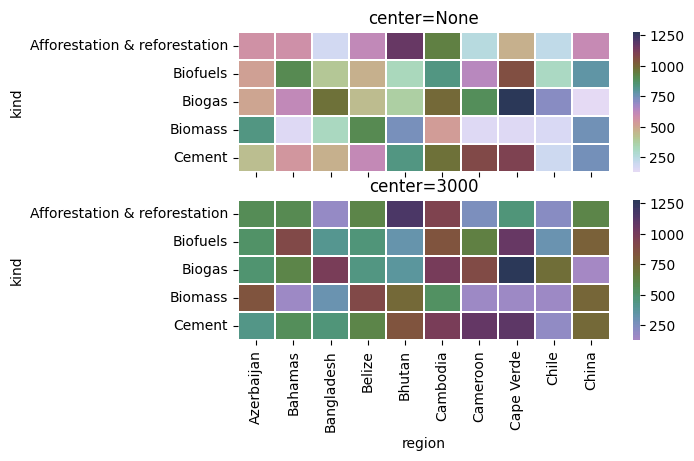

In [6]:
#center的用法(颜色)

f, (ax1,ax2) = plt.subplots(figsize = (6, 4),nrows=2)

cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(pt, linewidths = 0.05, ax = ax1, cmap=cmap, center=None )
ax1.set_title('center=None')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')

# 当center设置小于数据的均值时，生成的图片颜色要向0值代表的颜色一段偏移
sns.heatmap(pt, linewidths = 0.05, ax = ax2, cmap=cmap, center=200)   
ax2.set_title('center=3000')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')

Text(45.7222222222222, 0.5, 'kind')

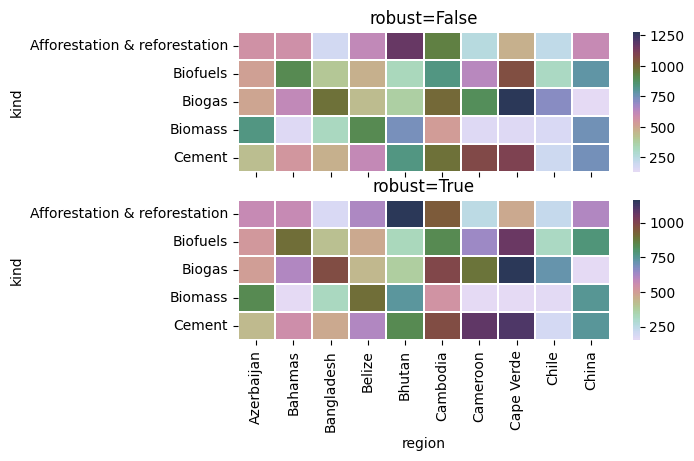

In [7]:
#robust的用法(颜色)

f, (ax1,ax2) = plt.subplots(figsize = (6,4),nrows=2)

cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)

sns.heatmap(pt, linewidths = 0.05, ax = ax1, cmap=cmap, center=None, robust=False )
ax1.set_title('robust=False')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')

sns.heatmap(pt, linewidths = 0.05, ax = ax2, cmap=cmap, center=None, robust=True ) 
ax2.set_title('robust=True')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')

<Axes: >

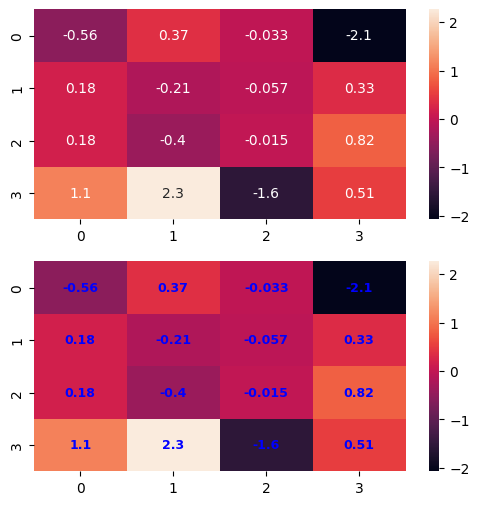

In [8]:
#annot(矩阵上数字),annot_kws(矩阵上数字的大小颜色字体)matplotlib包text类下的字体设置

import numpy as np
np.random.seed(20180316)
x = np.random.randn(4, 4)

f, (ax1, ax2) = plt.subplots(figsize=(6,6),nrows=2)

sns.heatmap(x, annot=True, ax=ax1)

sns.heatmap(x, annot=True, ax=ax2, annot_kws={'size':9,'weight':'bold', 'color':'blue'})
# Keyword arguments for ax.text when annot is True.  http://stackoverflow.com/questions/35024475/seaborn-heatmap-key-words

<Axes: >

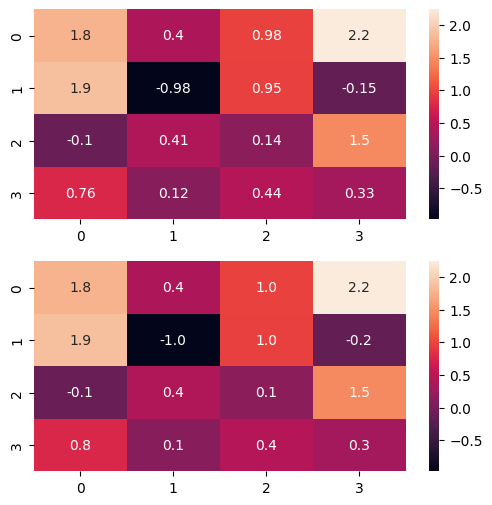

In [9]:
#fmt(字符串格式代码，矩阵上标识数字的数据格式，比如保留小数点后几位数字)

import numpy as np
np.random.seed(0)
x = np.random.randn(4,4)

f, (ax1, ax2) = plt.subplots(figsize=(6,6),nrows=2)

sns.heatmap(x, annot=True, ax=ax1)

sns.heatmap(x, annot=True, fmt='.1f', ax=ax2)